## the basic syntax

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

In [3]:
hello = tf.constant("Hello ")
world = tf.constant("World")

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
with tf.Session() as sess:
    result = sess.run(hello+world)
result

b'Hello World'

In [8]:
a = tf.constant(10)
b = tf.constant(20)
a+b

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [9]:
with tf.Session() as sess:
    result = sess.run(a+b)
result

30

In [10]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))
myrandn = tf.random_normal((4,4),mean=0,stddev=1.0)
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

In [11]:
## interactive session, for notebook setting, it allows you to constantly call it in different cells
sess = tf.InteractiveSession()

for op in my_ops:
    print(sess.run(op))

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[-0.1164476   1.558452   -0.14658704 -0.7233389 ]
 [ 0.37005195  0.12267919  1.5657642  -0.5495441 ]
 [-1.5993818  -0.66277635  0.44816634  0.7482236 ]
 [ 1.1612321   0.76291245  1.1334741  -0.88935715]]
[[0.4968444  0.47574806 0.10182238 0.6032288 ]
 [0.28885972 0.16087663 0.42478716 0.43086553]
 [0.88989127 0.93224573 0.9323256  0.548149  ]
 [0.66196966 0.27031326 0.84950197 0.46135187]]


In [12]:
const.eval()

10

In [13]:
## matrix multiplication

a = tf.constant([[1,2],[3,4]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [14]:
b = tf.constant([[10],[100]])
result = tf.matmul(a,b)
sess.run(result)

array([[210],
       [430]], dtype=int32)

In [15]:
result.eval()

array([[210],
       [430]], dtype=int32)

## TF Graphs

In [16]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1+n2

with tf.Session() as sess:
    result = sess.run(n3)
result

3

In [17]:
print(tf.get_default_graph())

In [18]:
g = tf.Graph()
print(g) ## a different graph

In [19]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()
print(graph_one,graph_two)

<tensorflow.python.framework.ops.Graph object at 0xb33b194e0> <tensorflow.python.framework.ops.Graph object at 0x103bcba90>


In [20]:
#### change default graph
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [21]:
print(graph_two is tf.get_default_graph())

False


## Variables and Placeholders

In [22]:
my_tensor = tf.random_uniform((4,4),minval=0,maxval=1)
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [24]:
my_var = tf.Variable(initial_value=my_tensor)
print(my_var)

<tf.Variable 'Variable_1:0' shape=(4, 4) dtype=float32_ref>


In [28]:
sess = tf.InteractiveSession()

In [32]:
# sess.run(my_var) ## will error out, variable needs to be initialized

In [30]:
init = tf.global_variables_initializer()
sess.run(init)

In [31]:
sess.run(my_var)

array([[0.6859342 , 0.5221437 , 0.54503703, 0.29355812],
       [0.7493961 , 0.16436303, 0.71305466, 0.02734005],
       [0.10233593, 0.8658657 , 0.5501772 , 0.81387913],
       [0.05853021, 0.08138287, 0.24229705, 0.4720198 ]], dtype=float32)

In [33]:
# ph = tf.placeholder(dtype=tf.float32,shape=(None,4))
ph = tf.placeholder(dtype=tf.float32)

## construct TF neural network

In [34]:
#### create a graph of a linear line: wx + b = z

In [35]:
import numpy as np

In [36]:
np.random.seed(101)
tf.set_random_seed(101)

In [45]:
# rand_a = tf.random_uniform(minval=0,maxval=100,shape=(5,5))
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[68.06777682, 52.15481923,  4.33966944, 22.39366035, 57.52050869],
       [12.04336601, 50.01167138, 13.80095683,  5.28084011, 17.82769225],
       [44.23681315, 87.75873246, 94.9264129 , 47.81674168, 46.11193423],
       [63.7289031 , 32.46079964, 11.7578093 ,  5.11009964, 63.76586528],
       [81.22658949, 67.02604203, 65.17677035, 42.45689436, 65.65953362]])

In [46]:
rand_b = np.random.uniform(0,100,(5,5))

In [47]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add_op = a + b
mul_op = a * b

with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)
    
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

30.0
[[1423.7158  3441.8245   229.83905 1676.211    539.2942 ]
 [ 944.8284  3437.0125   959.27484  262.38727 1738.8438 ]
 [ 900.3413  2624.1653  2161.0557   230.32791 4168.3867 ]
 [ 510.4911  1971.0726   741.73755  193.1321    84.43245]
 [6841.061   2580.0852  3595.5798  3016.7244  4433.849  ]]


## Example Neural Network

In [48]:
n_features = 10
n_dense_neurons = 2

x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [49]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
print(layer_out)

[[0.7232908  0.92227525]]


## Simple Regression Example

In [50]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([0.70070284, 2.35277969, 2.8251847 , 2.99892715, 5.77122231,
       6.26502955, 5.88205983, 8.74909896, 9.67072922, 9.68412722])

In [51]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

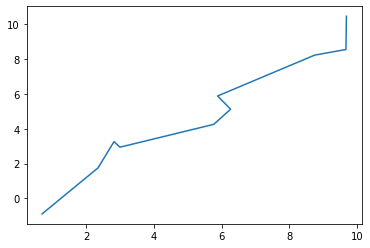

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data,y_label)
plt.show()

In [55]:
np.random.rand(2)

array([0.36227336, 0.35650201])

In [56]:
m = tf.Variable(0.36)
b = tf.Variable(0.36)

error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [59]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

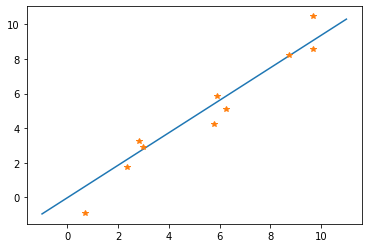

In [60]:
x_test = np.linspace(-1,11,10)

# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot)
plt.plot(x_data,y_label,'*')
plt.show()